1) The data should not contain variable like 'Ticker Symbol' and 'Period Ending' for regression model building. 

2) Remove any NA value in this dataset. You might not have to worry in R but not for Python statsmodels.

3) For 7A, please exact first 25 variables from the dataset to build regression model with interaction terms

4) Extract HTML or PDF file from Jupyter Notebook for submission.

## Question 1

1. Data  and Visualization:
Explore the “fundamentals.csv”. Include any other plots you find interesting. (10 pts)

In [1]:
#Import the necessary packages:
#!pip install matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Import the file onto the data frame:
fundamentals_df = pd.read_csv("fundamentals.csv")
fundamentals_df.head()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


In [3]:
sample_size = len(fundamentals_df)
first_observation = fundamentals_df.iloc[0]
first_three_observations = fundamentals_df.iloc[:3]
summary = fundamentals_df.describe(include='all')
# Replace all the NaN values with 0
fundamentals_df.fillna(0, inplace=True)

In [4]:
#sample_size, first_observation, first_three_observations, summary

### print(fundamentals_df.columns)


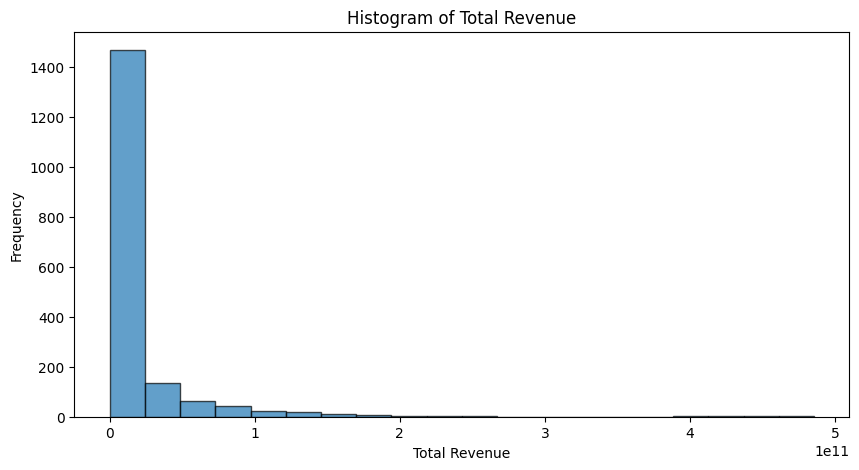

In [5]:
plt.figure(figsize=(10, 5))
plt.hist(fundamentals_df['Total Revenue'], bins=20, edgecolor='black', alpha=0.7)
plt.title("Histogram of Total Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Frequency")
plt.show()

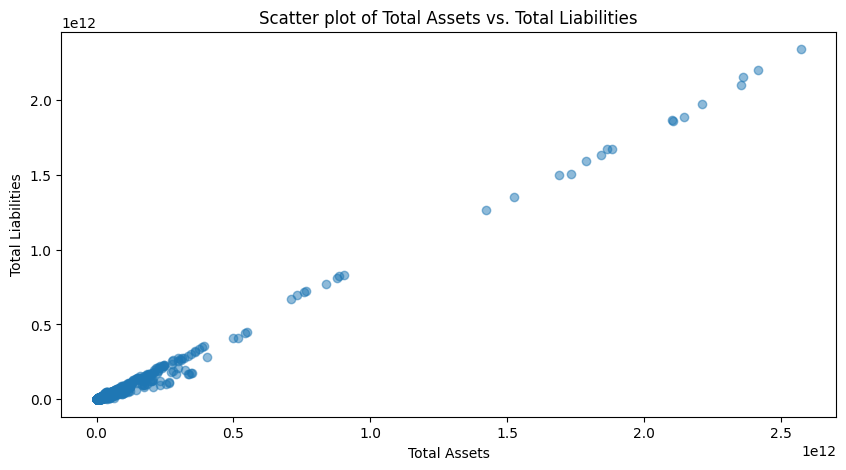

In [6]:
#scatter plot of Total Assets vs Total Liabilities
plt.figure(figsize=(10, 5))
plt.scatter(fundamentals_df['Total Assets'], fundamentals_df['Total Liabilities'], alpha=0.5)
plt.title("Scatter plot of Total Assets vs. Total Liabilities")
plt.xlabel("Total Assets")
plt.ylabel("Total Liabilities")
plt.show()

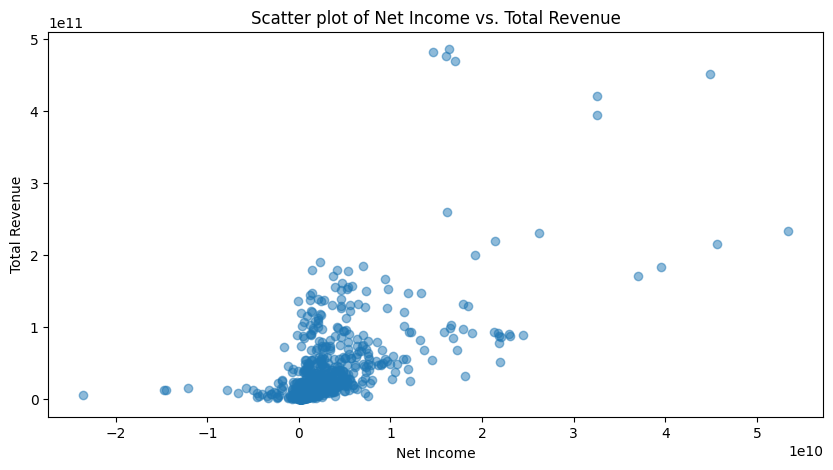

In [7]:
#Scatter Plot of Net income vs Total Revenue:
plt.figure(figsize=(10, 5))
plt.scatter(fundamentals_df['Net Income'], fundamentals_df['Total Revenue'], alpha=0.5)
plt.title("Scatter plot of Net Income vs. Total Revenue")
plt.xlabel("Net Income")
plt.ylabel("Total Revenue")
plt.show()

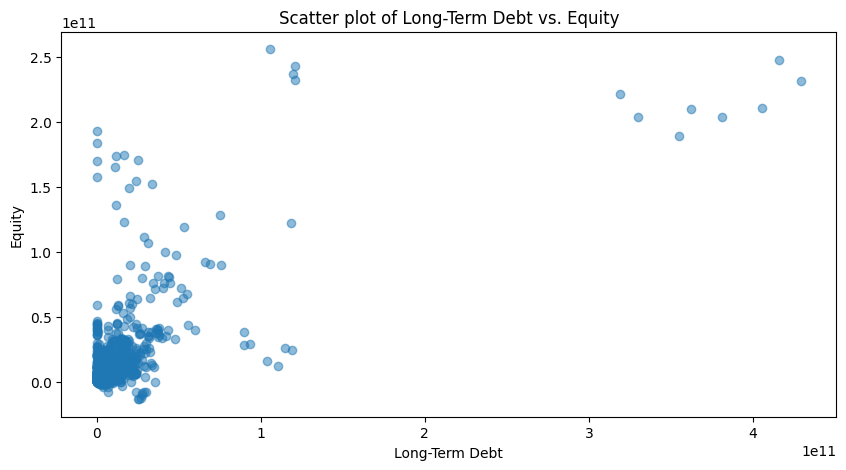

In [8]:
#Scatter Plot of Long-Term Debt vs Equity:
plt.figure(figsize=(10, 5))
plt.scatter(fundamentals_df['Long-Term Debt'], fundamentals_df['Total Equity'], alpha=0.5)
plt.title("Scatter plot of Long-Term Debt vs. Equity")
plt.xlabel("Long-Term Debt")
plt.ylabel("Equity")
plt.show()

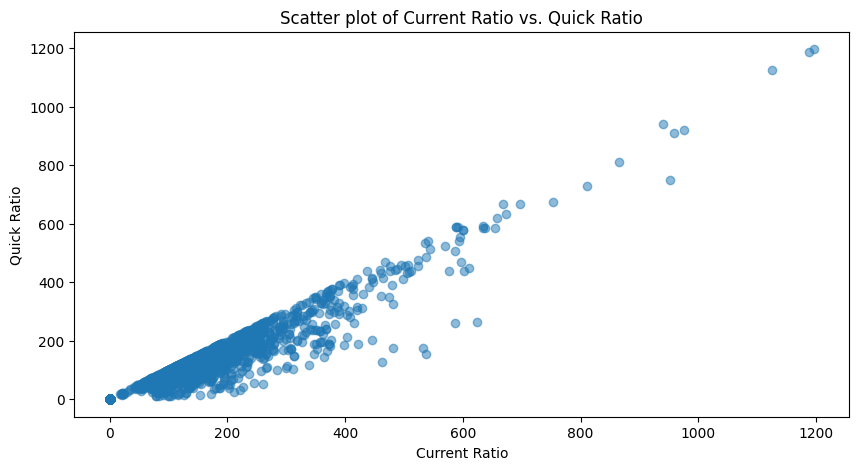

In [9]:
#Scatter Plot of Current Ratio vs Quick Ratio:
plt.figure(figsize=(10, 5))
plt.scatter(fundamentals_df['Current Ratio'], fundamentals_df['Quick Ratio'], alpha=0.5)
plt.title("Scatter plot of Current Ratio vs. Quick Ratio")
plt.xlabel("Current Ratio")
plt.ylabel("Quick Ratio")
plt.show()

## Question 2

Linear Regression Model Development: Create linear regression to predict Estimated
Shares Outstanding. Explain your model.

In [10]:
#!pip install statsmodels

import statsmodels.formula.api as smf

In [11]:
# Linear reggression to predict Estimated Shares outstanding
model_ESO = smf.ols(formula='Q("Estimated Shares Outstanding") ~ Q("Accounts Payable") + Q("Accounts Receivable") + Q("Add\'l income/expense items") + Q("After Tax ROE") + Q("Capital Expenditures") + Q("Capital Surplus") + Q("Cash Ratio") + Q("Cash and Cash Equivalents") + Q("Changes in Inventories") + Q("Common Stocks") + Q("Cost of Revenue") + Q("Current Ratio") + Q("Deferred Asset Charges") + Q("Deferred Liability Charges") + Q("Depreciation") + Q("Earnings Before Interest and Tax") + Q("Earnings Before Tax") + Q("Effect of Exchange Rate") + Q("Equity Earnings/Loss Unconsolidated Subsidiary") + Q("Fixed Assets") + Q("Goodwill") + Q("Gross Margin") + Q("Gross Profit") + Q("Income Tax") + Q("Intangible Assets") + Q("Interest Expense") + Q("Inventory") + Q("Investments") + Q("Liabilities") + Q("Long-Term Debt") + Q("Long-Term Investments") + Q("Minority Interest") + Q("Misc. Stocks") + Q("Net Borrowings") + Q("Net Cash Flow") + Q("Net Cash Flow-Operating") + Q("Net Cash Flows-Financing") + Q("Net Cash Flows-Investing") + Q("Net Income") + Q("Net Income Adjustments") + Q("Net Income Applicable to Common Shareholders") + Q("Net Income-Cont. Operations") + Q("Net Receivables") + Q("Non-Recurring Items") + Q("Operating Income") + Q("Operating Margin") + Q("Other Assets") + Q("Other Current Assets") + Q("Other Current Liabilities") + Q("Other Equity") + Q("Other Financing Activities") + Q("Other Investing Activities") + Q("Other Liabilities") + Q("Other Operating Activities") + Q("Other Operating Items") + Q("Pre-Tax Margin") + Q("Pre-Tax ROE") + Q("Profit Margin") + Q("Quick Ratio") + Q("Research and Development") + Q("Retained Earnings") + Q("Sale and Purchase of Stock") + Q("Sales, General and Admin.") + Q("Short-Term Debt / Current Portion of Long-Term Debt") + Q("Short-Term Investments") + Q("Total Assets") + Q("Total Current Assets") + Q("Total Current Liabilities") + Q("Total Equity") + Q("Total Liabilities") + Q("Total Liabilities & Equity") + Q("Total Revenue") + Q("Treasury Stock") + Q("For Year") + Q("Earnings Per Share")', data=fundamentals_df).fit()

In [12]:
# Display the summary of the first regression model
model_ESO.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Q("Estimated Shares Outstanding")   R-squared:                       0.835
Model:                                           OLS   Adj. R-squared:                  0.828
Method:                                Least Squares   F-statistic:                     117.0
Date:                               Wed, 17 Jan 2024   Prob (F-statistic):               0.00
Time:                                       15:11:55   Log-Likelihood:                -37979.
No. Observations:                               1781   AIC:                         7.611e+04
Df Residuals:                                   1706   BIC:                         7.652e+04
Df Model:                                         74                                         
Covariance Type:                           nonrobust                                         
============================================================================================================================
                                                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
Intercept                                                -3.662e+08   5.17e+07     -7.078      0.000   -4.68e+08   -2.65e+08
Q("Accounts Payable")                                       -0.0238      0.006     -4.013      0.000      -0.035      -0.012
Q("Accounts Receivable")                                    -0.0685      0.026     -2.653      0.008      -0.119      -0.018
Q("Add'l income/expense items")                              0.1818      0.031      5.846      0.000       0.121       0.243
Q("After Tax ROE")                                        1.121e+05   3.09e+05      0.363      0.717   -4.94e+05    7.19e+05
Q("Capital Expenditures")                                    0.0423      0.015      2.887      0.004       0.014       0.071
Q("Capital Surplus")                                         0.0199      0.009      2.144      0.032       0.002       0.038
Q("Cash Ratio")                                           2.426e+05   3.46e+05      0.701      0.483   -4.36e+05    9.21e+05
Q("Cash and Cash Equivalents")                               0.0036      0.002      1.472      0.141      -0.001       0.008
Q("Changes in Inventories")                                 -0.0333      0.032     -1.034      0.301      -0.097       0.030
Q("Common Stocks")                                          -0.0004      0.010     -0.042      0.966      -0.020       0.019
Q("Cost of Revenue")                                        -0.0072      0.015     -0.476      0.634      -0.037       0.023
Q("Current Ratio")                                       -1.124e+04   2.85e+05     -0.039      0.969   -5.71e+05    5.49e+05
Q("Deferred Asset Charges")                                 -0.0051      0.010     -0.518      0.605      -0.025       0.014
Q("Deferred Liability Charges")                             -0.0279      0.008     -3.376      0.001      -0.044      -0.012
Q("Depreciation")                                           -0.0316      0.017     -1.840      0.066      -0.065       0.002
Q("Earnings Before Interest and Tax")                       -1.4952      0.272     -5.495      0.000      -2.029      -0.961
Q("Earnings Before Tax")                                     1.0775      0.273      3.945      0.000       0.542       1.613
Q("Effect of Exchange Rate")                                -0.5483      0.119     -4.617      0.000      -0.781      -0.315
Q("Equity Earnings/Loss Unconsolidated Subsidiary")          0.2490      0.058      4.326      0.000       0.136       0.362
Q("Fixed Assets")                          

## Question 4

P-Value Analysis and Histogram: Create a histogram of the p-values. Is there any skewedness? Provide your explanation

In [13]:
p_values = model_ESO.pvalues

In [14]:
# I create an array of p-values. I exclude the intercept.
predictor_p_values = p_values.values

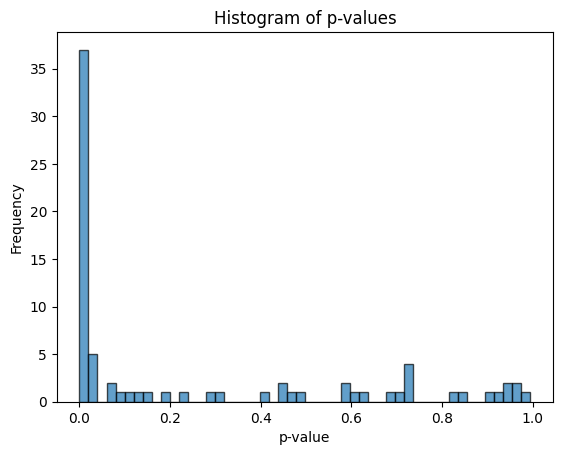

In [15]:
# I plot the histogram
plt.hist(predictor_p_values, bins=50, edgecolor='black', alpha=0.7)
plt.title("Histogram of p-values")
plt.xlabel("p-value")
plt.ylabel("Frequency")
plt.show()

## Question 5

False Discovery Rate Control with BH Procedure: Given the p values you find, use the BH procedure to control the FDR with a q of 0.1. How many “true” discoveries do you estimate? (15 pts)

Alpha: 0.0395245938702212


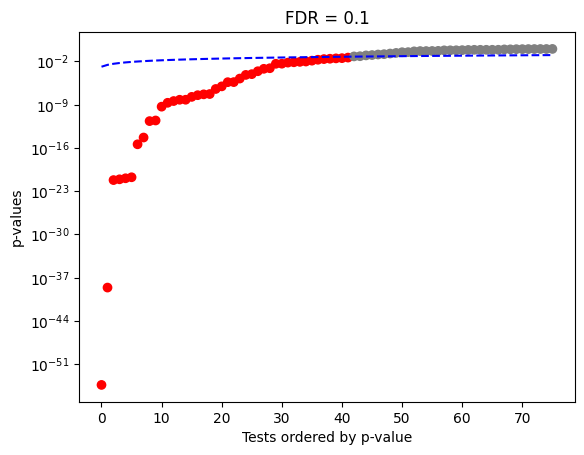

In [16]:
def fdr(pvals, q, plotit=False):
    # Remove NA values
    pvals = np.array(pvals)
    pvals = pvals[~np.isnan(pvals)]
    # I sort the p-values and compute the FDR threshold
    N = len(pvals)
    sorted_pvals = np.sort(pvals)
    k = np.arange(1, N+1)
    fdr_threshold = (q * k) / N
  
    # I Find the last p-value that is below the FDR threshold
    below_threshold = sorted_pvals <= fdr_threshold
    max_index = np.max(np.where(below_threshold)) if np.any(below_threshold) else 0
    alpha = sorted_pvals[max_index]
    print(f"Alpha: {alpha}")
     # Optional plot
    if plotit:
        plt.scatter(range(N), sorted_pvals, c=np.where(sorted_pvals <= alpha, 'red', 'grey'), marker='o')
        plt.yscale('log')
        plt.plot(range(N), fdr_threshold, linestyle='--', color='blue')
        plt.xlabel("Tests ordered by p-value")
        plt.ylabel("p-values")
        plt.title(f"FDR = {q}")
        plt.show()
  
    return alpha

# Function is at 0.1 for q values
alpha = fdr(p_values, 0.1, plotit=True)

In [17]:
true_discoveries = np.sum(p_values <= alpha)

print(f"There are are {true_discoveries} true_discoveries")

There are are 42 true_discoveries


## Question 6

Sensitivity Analysis of FDR Control: If you apply the BH procedure at different q values, how do the results change? What does this tell you about the robustness of your significant variables? 

To apply the FDR procedure at different q values, I decided to make a list of possible q values, and run that list through a "for loop."
Then, I count how many of the p-values are less than the alpha threshold. 

In [18]:
#I create the list of possible q values
qvals = [0.01, 0.05, 0.10, 0.15, 0.20]
q_results = []

#I create the for loop
for q in qvals:
    alpha = fdr(p_values, q, plotit=False)
    true_discoveries = np.sum(p_values <= alpha)
    q_results.append((q, true_discoveries))
    print(f"If the q value is {q}, then the 'true' discoveries are {true_discoveries}")

Alpha: 0.004069659719764579
If the q value is 0.01, then the 'true' discoveries are 31
Alpha: 0.022617603455001245
If the q value is 0.05, then the 'true' discoveries are 38
Alpha: 0.0395245938702212
If the q value is 0.1, then the 'true' discoveries are 42
Alpha: 0.06600693909992142
If the q value is 0.15, then the 'true' discoveries are 44
Alpha: 0.10145751883776309
If the q value is 0.2, then the 'true' discoveries are 46


## Question 7

a. Expand your linear regression model by adding interaction terms. Create interaction terms between pairs of predictors (up to quadratic terms, i.e., terms of power two). You should include both original predictors and their interaction terms in your model.

In [19]:
# Linear reggression to predict Estimated Shares outstanding
model_Interactions = smf.ols(formula='Q("Estimated Shares Outstanding") ~ Q("Accounts Payable") + Q("Accounts Receivable") + Q("Add\'l income/expense items") + Q("After Tax ROE") + Q("Capital Expenditures") + Q("Capital Surplus") + Q("Cash Ratio") + Q("Cash and Cash Equivalents") + Q("Changes in Inventories") + Q("Common Stocks") + Q("Cost of Revenue") + Q("Current Ratio") + Q("Deferred Asset Charges") + Q("Deferred Liability Charges") + Q("Depreciation") + Q("Earnings Before Interest and Tax") + Q("Earnings Before Tax") + Q("Effect of Exchange Rate") + Q("Equity Earnings/Loss Unconsolidated Subsidiary") + Q("Fixed Assets") + Q("Goodwill") + Q("Gross Margin") + Q("Gross Profit") + Q("Income Tax") + Q("Intangible Assets") + Q("Common Stocks"):Q("Cash and Cash Equivalents") + Q("Capital Expenditures"):Q("Gross Profit") + Q("Cash Ratio"):Q("Current Ratio") + Q("Earnings Before Interest and Tax"):Q("Income Tax") + Q("Gross Margin"):Q("Gross Profit")', data=fundamentals_df).fit()

In [20]:
model_Interactions.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Q("Estimated Shares Outstanding")   R-squared:                       0.669
Model:                                           OLS   Adj. R-squared:                  0.664
Method:                                Least Squares   F-statistic:                     147.9
Date:                               Wed, 17 Jan 2024   Prob (F-statistic):               0.00
Time:                                       15:11:56   Log-Likelihood:                -38601.
No. Observations:                               1781   AIC:                         7.725e+04
Df Residuals:                                   1756   BIC:                         7.739e+04
Df Model:                                         24                                         
Covariance Type:                           nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                             -1.103e-05   1.26e-05     -0.878      0.380   -3.57e-05    1.36e-05
Q("Accounts Payable")                                    -0.0048      0.003     -1.533      0.125      -0.011       0.001
Q("Accounts Receivable")                                 -0.0609      0.021     -2.864      0.004      -0.103      -0.019
Q("Add'l income/expense items")                           0.0048      0.027      0.180      0.857      -0.048       0.058
Q("After Tax ROE")                                     3.096e-08   1.23e-08      2.519      0.012    6.86e-09    5.51e-08
Q("Capital Expenditures")                                 0.0236      0.017      1.404      0.160      -0.009       0.057
Q("Capital Surplus")                                      0.0316      0.003     11.201      0.000       0.026       0.037
Q("Cash Ratio")                                        5.526e-08   1.57e-08      3.519      0.000    2.45e-08    8.61e-08
Q("Cash and Cash Equivalents")                            0.0022      0.001      2.874      0.004       0.001       0.004
Q("Changes in Inventories")                              -0.0384      0.041     -0.935      0.350      -0.119       0.042
Q("Common Stocks")                                        0.0485      0.004     12.933      0.000       0.041       0.056
Q("Cost of Revenue")                                     -0.0013      0.001     -0.899      0.369      -0.004       0.001
Q("Current Ratio")                                      1.17e-07   3.86e-08      3.027      0.003    4.12e-08    1.93e-07
Q("Deferred Asset Charges")                              -0.0546      0.008     -7.233      0.000      -0.069      -0.040
Q("Deferred Liability Charges")                           0.0129      0.008      1.570      0.117      -0.003       0.029
Q("Depreciation")                                         0.0555      0.017      3.223      0.001       0.022       0.089
Q("Earnings Before Interest and Tax")                    -0.1693      0.028     -6.044      0.000      -0.224      -0.114
Q("Earnings Before Tax")                                  0.2301      0.029      8.013      0.000       0.174       0.286
Q("Effect of Exchange Rate")                             -0.6412      0.114     -5.612      0.000      -0.865      -0.417
Q("Equity Earnings/Loss Unconsolidated Subsidiary")       0.1486      0.048      3.064      0.002       0.053       0.244
Q("Fixed Assets")                                         0.0030      0.003      1.166      0.244      -0.002   

## Question 8 

Evaluate the performance of this new model with interaction terms. Compare it with the performance of the original model without interaction terms using appropriate metrics.
d. Discuss any significant changes in the model's performance or the coefficients of the predictors

In [21]:
# Linear reggression that includes interactions
model_interactions = smf.ols(formula='Q("Estimated Shares Outstanding") ~ Q("Accounts Payable") + Q("Accounts Receivable") + Q("Add\'l income/expense items") + Q("After Tax ROE") + Q("Capital Expenditures") + Q("Capital Surplus") + Q("Cash Ratio") + Q("Cash and Cash Equivalents") + Q("Changes in Inventories") + Q("Common Stocks") + Q("Cost of Revenue") + Q("Current Ratio") + Q("Deferred Asset Charges") + Q("Deferred Liability Charges") + Q("Depreciation") + Q("Earnings Before Interest and Tax") + Q("Earnings Before Tax") + Q("Effect of Exchange Rate") + Q("Equity Earnings/Loss Unconsolidated Subsidiary") + Q("Fixed Assets") + Q("Goodwill") + Q("Gross Margin") + Q("Gross Profit") + Q("Income Tax") + Q("Intangible Assets") + Q("Common Stocks"):Q("Cash and Cash Equivalents") + Q("Capital Expenditures"):Q("Gross Profit") + Q("Cash Ratio"):Q("Current Ratio") + Q("Earnings Before Interest and Tax"):Q("Income Tax") + Q("Gross Margin"):Q("Gross Profit")', data=fundamentals_df).fit()
model_interactions.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Q("Estimated Shares Outstanding")   R-squared:                       0.669
Model:                                           OLS   Adj. R-squared:                  0.664
Method:                                Least Squares   F-statistic:                     147.9
Date:                               Wed, 17 Jan 2024   Prob (F-statistic):               0.00
Time:                                       15:11:56   Log-Likelihood:                -38601.
No. Observations:                               1781   AIC:                         7.725e+04
Df Residuals:                                   1756   BIC:                         7.739e+04
Df Model:                                         24                                         
Covariance Type:                           nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                             -1.103e-05   1.26e-05     -0.878      0.380   -3.57e-05    1.36e-05
Q("Accounts Payable")                                    -0.0048      0.003     -1.533      0.125      -0.011       0.001
Q("Accounts Receivable")                                 -0.0609      0.021     -2.864      0.004      -0.103      -0.019
Q("Add'l income/expense items")                           0.0048      0.027      0.180      0.857      -0.048       0.058
Q("After Tax ROE")                                     3.096e-08   1.23e-08      2.519      0.012    6.86e-09    5.51e-08
Q("Capital Expenditures")                                 0.0236      0.017      1.404      0.160      -0.009       0.057
Q("Capital Surplus")                                      0.0316      0.003     11.201      0.000       0.026       0.037
Q("Cash Ratio")                                        5.526e-08   1.57e-08      3.519      0.000    2.45e-08    8.61e-08
Q("Cash and Cash Equivalents")                            0.0022      0.001      2.874      0.004       0.001       0.004
Q("Changes in Inventories")                              -0.0384      0.041     -0.935      0.350      -0.119       0.042
Q("Common Stocks")                                        0.0485      0.004     12.933      0.000       0.041       0.056
Q("Cost of Revenue")                                     -0.0013      0.001     -0.899      0.369      -0.004       0.001
Q("Current Ratio")                                      1.17e-07   3.86e-08      3.027      0.003    4.12e-08    1.93e-07
Q("Deferred Asset Charges")                              -0.0546      0.008     -7.233      0.000      -0.069      -0.040
Q("Deferred Liability Charges")                           0.0129      0.008      1.570      0.117      -0.003       0.029
Q("Depreciation")                                         0.0555      0.017      3.223      0.001       0.022       0.089
Q("Earnings Before Interest and Tax")                    -0.1693      0.028     -6.044      0.000      -0.224      -0.114
Q("Earnings Before Tax")                                  0.2301      0.029      8.013      0.000       0.174       0.286
Q("Effect of Exchange Rate")                             -0.6412      0.114     -5.612      0.000      -0.865      -0.417
Q("Equity Earnings/Loss Unconsolidated Subsidiary")       0.1486      0.048      3.064      0.002       0.053       0.244
Q("Fixed Assets")                                         0.0030      0.003      1.166      0.244      -0.002   

In [22]:
# Linear regressionm model with no interactions
model_OLS = smf.ols(formula='Q("Estimated Shares Outstanding") ~ Q("Accounts Payable") + Q("Accounts Receivable") + Q("Add\'l income/expense items") + Q("After Tax ROE") + Q("Capital Expenditures") + Q("Capital Surplus") + Q("Cash Ratio") + Q("Cash and Cash Equivalents") + Q("Changes in Inventories") + Q("Common Stocks") + Q("Cost of Revenue") + Q("Current Ratio") + Q("Deferred Asset Charges") + Q("Deferred Liability Charges") + Q("Depreciation") + Q("Earnings Before Interest and Tax") + Q("Earnings Before Tax") + Q("Effect of Exchange Rate") + Q("Equity Earnings/Loss Unconsolidated Subsidiary") + Q("Fixed Assets") + Q("Goodwill") + Q("Gross Margin") + Q("Gross Profit") + Q("Income Tax") + Q("Intangible Assets")', data=fundamentals_df).fit()

In [23]:
model_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Q("Estimated Shares Outstanding")   R-squared:                       0.670
Model:                                           OLS   Adj. R-squared:                  0.666
Method:                                Least Squares   F-statistic:                     142.7
Date:                               Wed, 17 Jan 2024   Prob (F-statistic):               0.00
Time:                                       15:11:56   Log-Likelihood:                -38597.
No. Observations:                               1781   AIC:                         7.725e+04
Df Residuals:                                   1755   BIC:                         7.739e+04
Df Model:                                         25                                         
Covariance Type:                           nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
Intercept                                            1.012e+08   4.59e+07      2.204      0.028    1.12e+07    1.91e+08
Q("Accounts Payable")                                  -0.0011      0.003     -0.406      0.685      -0.006       0.004
Q("Accounts Receivable")                               -0.0592      0.021     -2.783      0.005      -0.101      -0.017
Q("Add'l income/expense items")                        -0.0165      0.027     -0.622      0.534      -0.069       0.036
Q("After Tax ROE")                                  -2.389e+04   6.41e+04     -0.373      0.710    -1.5e+05    1.02e+05
Q("Capital Expenditures")                               0.0408      0.016      2.499      0.013       0.009       0.073
Q("Capital Surplus")                                    0.0288      0.003     10.738      0.000       0.024       0.034
Q("Cash Ratio")                                       6.36e+05   3.19e+05      1.995      0.046    1.08e+04    1.26e+06
Q("Cash and Cash Equivalents")                          0.0024      0.001      3.072      0.002       0.001       0.004
Q("Changes in Inventories")                            -0.0333      0.041     -0.811      0.417      -0.114       0.047
Q("Common Stocks")                                      0.0566      0.003     19.592      0.000       0.051       0.062
Q("Cost of Revenue")                                   -0.0006      0.001     -0.629      0.529      -0.002       0.001
Q("Current Ratio")                                  -2.583e+04   2.23e+05     -0.116      0.908   -4.63e+05    4.11e+05
Q("Deferred Asset Charges")                            -0.0453      0.007     -6.223      0.000      -0.060      -0.031
Q("Deferred Liability Charges")                         0.0179      0.008      2.190      0.029       0.002       0.034
Q("Depreciation")                                       0.0475      0.017      2.805      0.005       0.014       0.081
Q("Earnings Before Interest and Tax")                  -0.1460      0.027     -5.462      0.000      -0.198      -0.094
Q("Earnings Before Tax")                                0.1970      0.027      7.409      0.000       0.145       0.249
Q("Effect of Exchange Rate")                           -0.7743      0.110     -7.032      0.000      -0.990      -0.558
Q("Equity Earnings/Loss Unconsolidated Subsidiary")     0.0459      0.036      1.289      0.198      -0.024       0.116
Q("Fixed Assets")                                       0.0034      0.002      1.377      0.169      -0.001       0.008
Q("Goodwill")                         

Model with Interaction Terms:

    R-squared: 0.669
    Adjusted R-squared: 0.664
    AIC: 7.725e+04
    Significant Variables: Several variables and interaction terms are significant (p < 0.05).

Original Model (Without Interaction Terms):

    R-squared: 0.670
    Adjusted R-squared: 0.666
    AIC: 7.725e+04
    Significant Variables: Several variables are significant (p < 0.05).
    
    Notably Non-Significant Predictors and Interaction Terms:

Some variables and interaction terms have higher p-values, indicating that they are not statistically significant at the 5% level. Examples include:

    Q("Add'l income/expense items")
    Q("Capital Expenditures")
    Q("Changes in Inventories")
    Q("Cost of Revenue")
    Q("Earnings Before Interest and Tax"):Q("Income Tax")
    Q("Gross Margin"):Q("Gross Profit")

For these terms, the evidence is weaker that there's a real relationship with 'Estimated Shares Outstanding'. Non-significant terms don't necessarily mean there's no relationship, but they suggest that the relationship is not statistically detectable based on the data you have.

## Question 9

a. Create a histogram of the p-values for the new model including interaction terms.
Discuss any noticeable differences from the histogram you created for the original model.
(3pts)

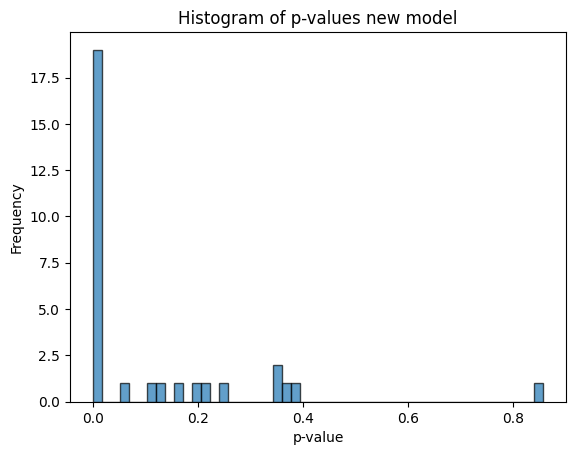

In [24]:
p_values_nm = model_interactions.pvalues
predictor_p_values_nm = p_values_nm.values
plt.hist(predictor_p_values_nm, bins=50, edgecolor='black', alpha=0.7)
plt.title("Histogram of p-values new model")
plt.xlabel("p-value")
plt.ylabel("Frequency")
plt.show()

b. Apply the Benjamini-Hochberg (BH) procedure to control the False Discovery Rate
(FDR) with a q-value of 0.1. How many significant predictors are identified now,
including both main effects and interaction effects? (5pts)

Alpha: 0.057608116114100424


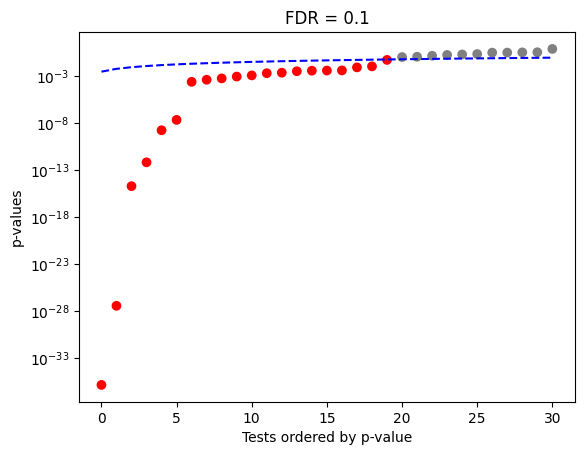

There are are 20 significant predictors, including significant main effects and interaction effects


In [25]:
# Function is at 0.1 for q values
alpha = fdr(p_values_nm, 0.1, plotit=True)
significant_predictors = np.sum(p_values_nm <= alpha)

print(f"There are are {significant_predictors} significant predictors, including significant main effects and interaction effects")

c. Compare these results with those obtained from the original model. Discuss the impact of including interaction terms on the number of discoveries and the control of the FDR. (2pts)